<a href="https://colab.research.google.com/github/JJukE/ReinforcementLearning/blob/main/10_1%20MNIST%20Problem%20using%20Fully%20Connected%20Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# 픽셀 값을 0~1 사이로 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# Define hyperparameters
learning_rate = 0.1
epochs = 10
batch_size = 100

In [5]:
print('No. of images in training set {}'.format(train_images.shape))
print('No. of labels in training set {}'.format(train_labels.shape))
print('No. of images in test set {}'.format(test_images.shape))
print('No. of labels in test set {}'.format(test_labels.shape))

No. of images in training set (60000, 28, 28)
No. of labels in training set (60000,)
No. of images in test set (10000, 28, 28)
No. of labels in test set (10000,)


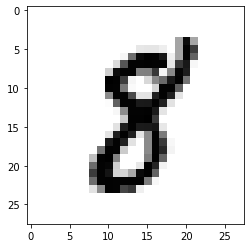

In [6]:
img1 = train_images[41].reshape(28, 28)
plt.imshow(img1, cmap='Greys')

In [7]:
train_images = np.reshape(train_images, (60000, -1))
test_images = np.reshape(test_images, (10000, -1))

In [8]:
model = models.Sequential()
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

sgd = optimizers.SGD(lr=learning_rate)

model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'], )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [9]:
model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size)

model.evaluate(test_images, test_labels, verbose=2)

Epoch 1/10
600/600 [==============================] - 3s 3ms/step - loss: 0.4121 - accuracy: 0.8880
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2284 - accuracy: 0.9352
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1790 - accuracy: 0.9497
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1479 - accuracy: 0.9585
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1257 - accuracy: 0.9649
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1096 - accuracy: 0.9693
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0969 - accuracy: 0.9728
Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0865 - accuracy: 0.9765
Epoch 9/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0776 - accuracy: 0.9789
Epoch 10/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0709 - accuracy: 0.9806

[0.08489198237657547, 0.974399983882904]

2

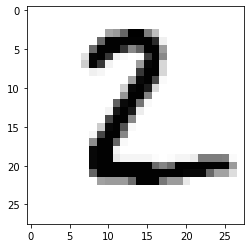

In [10]:
plt.imshow(test_images[1].reshape(28,28), cmap='Greys')
np.argmax(model.predict(test_images[1].reshape(1,784)))